<a href="https://colab.research.google.com/github/mmm4707/machine_learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리와 Google 드라이브 마운트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Google 드라이브 마운트
drive.mount('/content/gdrive', force_remount=True)

# 데이터 파일 경로 설정 및 MNIST 데이터 로드
filepath = '/content/gdrive/My Drive/'
mnist = np.load(filepath + "mnist.npz")

# 입력 데이터와 출력 데이터를 준비
x_train = (mnist['x_train'] - np.mean(mnist['x_train'])) / np.std(mnist['x_train'])
y_train = mnist['y_train']
x_test = (mnist['x_test'] - np.mean(mnist['x_train'])) / np.std(mnist['x_train'])
y_test = mnist['y_test']

Mounted at /content/gdrive


In [ ]:
# 활성화 함수 (Softmax)
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 오버플로우 방지 코드
    for i in range(len(x)):
        exp_x[i] /= np.sum(exp_x[i])
    return exp_x

# 가설 함수 정의
def hypothesis(w, x, b):
    return softmax(x.dot(w) + b)

# 교차 엔트로피 손실 함수 정의
def cross_entropy(y_true, y_pred):
    y_true = np.argmax(y_true, axis=-1)
    y_pred = y_pred[np.arange(y_true.shape[0]), y_true]

    return -np.mean(np.log(y_pred + 1e-8))


In [ ]:
# 출력 데이터를 원-핫 인코딩으로 변환
def to_onehot(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train_onehot = to_onehot(y_train, 10)  # 클래스는 0~9까지 10개
y_test_onehot = to_onehot(y_test, 10)  # 클래스는 0~9까지 10개

# 입력 데이터를 7x7 크기로 축소
x_train_small = x_train[:, ::4, ::4].reshape(-1, 7*7)
x_test_small = x_test[:, ::4, ::4].reshape(-1, 7*7)

In [ ]:
# 모델 가중치 및 편향 초기화
w = np.random.rand(7*7, 10)
b = np.random.rand(10)

In [ ]:
# 하이퍼파라미터 설정
epoch = 1000  # 에폭 설정
alpha = 0.1   # 학습률 설정
sample_num = x_train_small.shape[0]

total_loss = []
for i in range(epoch):
    h = hypothesis(w, x_train_small, b)
    loss = cross_entropy(y_train_onehot, h)

    # 경사하강법을 구현해보자!!!
    dw = x_train_small.T.dot(h - y_train_onehot) / sample_num
    db = np.sum(h - y_train_onehot) / sample_num
    w -= alpha * dw
    b -= alpha * db

    if i % 50 == 0:
        print(f"[Epoch : {i:3d}] Loss : {loss:.10f}")
    total_loss.append(loss)
total_loss = np.array(total_loss)

[Epoch :   0] Loss : 3.9330254474
[Epoch :  50] Loss : 1.3622257679
[Epoch : 100] Loss : 1.0759982671
[Epoch : 150] Loss : 0.9802337386
[Epoch : 200] Loss : 0.9325071264
[Epoch : 250] Loss : 0.9039463711
[Epoch : 300] Loss : 0.8849361367
[Epoch : 350] Loss : 0.8713499014
[Epoch : 400] Loss : 0.8611284661
[Epoch : 450] Loss : 0.8531337334
[Epoch : 500] Loss : 0.8466876616
[Epoch : 550] Loss : 0.8413621786
[Epoch : 600] Loss : 0.8368741947
[Epoch : 650] Loss : 0.8330292296
[Epoch : 700] Loss : 0.8296893413
[Epoch : 750] Loss : 0.8267539924
[Epoch : 800] Loss : 0.8241481660
[Epoch : 850] Loss : 0.8218147308
[Epoch : 900] Loss : 0.8197093854
[Epoch : 950] Loss : 0.8177972249


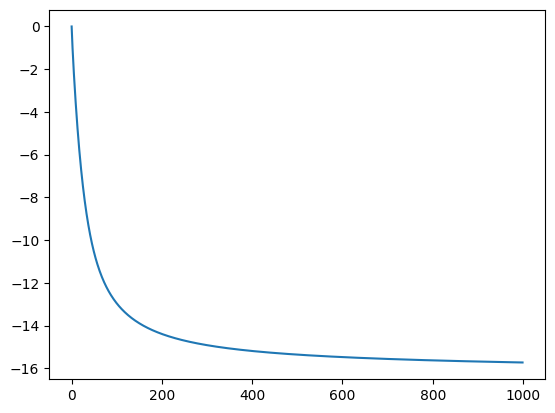

In [ ]:

plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-5))))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# 모델을 사용하여 테스트 데이터에 대한 예측 수행
y_pred_onehot = hypothesis(w, x_test_small, b)
y_pred = np.argmax(y_pred_onehot, axis=-1)

# 정확도 계산
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7522
